In [1]:
# 원의 방정식

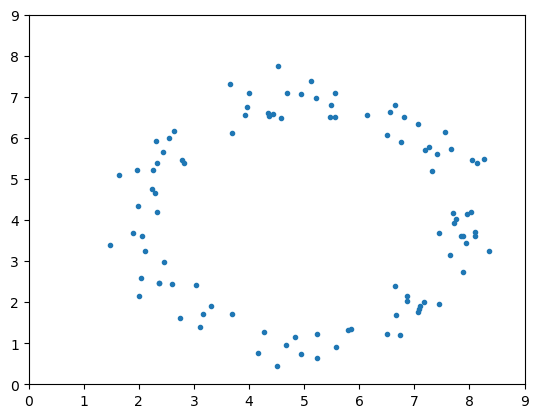

In [23]:
import numpy as np
import matplotlib.pyplot as plt

xc = 5 #원의 중심
yc = 4 #원의 중심
r = 3

m = 100
t = np.random.rand(m,1) * 2 * np.pi

x = r * np.cos(t) + xc + np.random.randn(m,1) * 0.3
y = r * np.sin(t) + yc + np.random.randn(m,1) * 0.3

plt.axis([0,9,0,9])
plt.plot(x,y,'.')


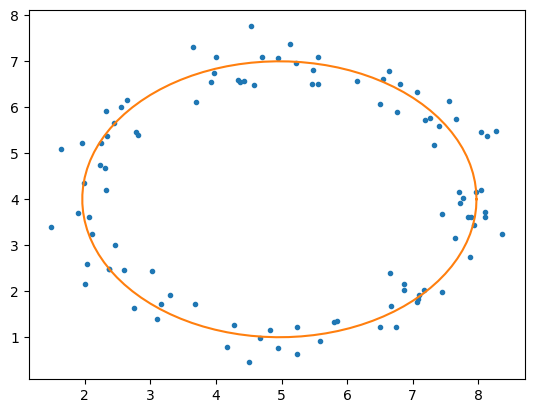

In [24]:
# (x-xc)^2 + (y-yc)^2 = r^2
# xc, yc, r를 구해야함 이제

# 1. 전개 
# 2. 파라미터가 있는 항은 왼쪽, 파라미터가 없는 항은 오른쪽
# 3. 계수가 1이거나 -1인 항은 bias항인데, 1개로 만든다
# -2ax-a^2-2yb+b^2-r^2 = -x^2-y^2

A = np.c_[-2*x, -2*y, np.ones((m,1))]
B = -x**2-y**2
theta = np.linalg.pinv(A) @ B
a, b, c = theta.flatten()
r = np.sqrt(a**2 + b**2 - c)

t = np.linspace(0, np.pi * 2, 100)
xt = np.cos(t) * r + a
yt = np.sin(t) * r + b

plt.plot(x, y, '.')
plt.plot(xt, yt, '-')


In [ ]:
# 영상 밝기 보정에 lms 활용

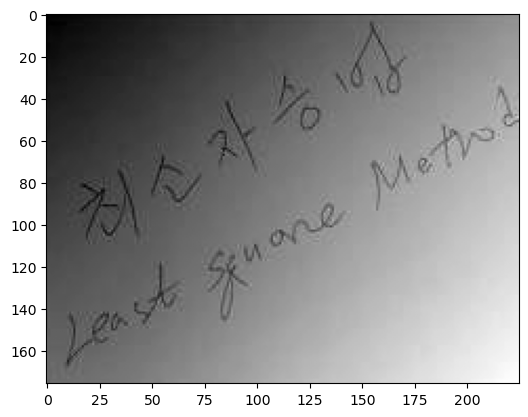

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('C:\\study\\numpy\\Image.png')
image = image.mean(axis=2).astype(np.uint8)

plt.imshow(image, cmap = 'gray')


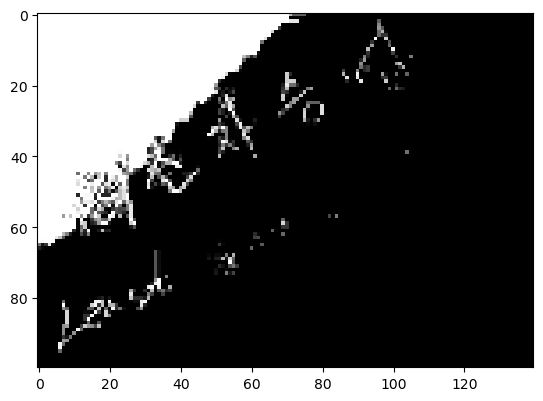

In [100]:
image = (image < 100).astype(np.uint8) * 255
#이미지의 각 픽셀 값에 대해 100보다 작으면 흰색

image = cv2.resize(image, (140, 100))
plt.imshow(image, cmap = 'gray')

In [109]:
x_list = []
y_list = []
v_list = []

H, W = image.shape

# for y in range(H):
#     for x in range(W):
#         v = image[y, x]
#         x_list.append(x)
#         y_list.append(y)
#         v_list.append(v)
# x = np.array(x_list).reshape(-1, 1)
# y = np.array(y_list).reshape(-1, 1)
# v = np.array(v_list).reshape(-1, 1)
xx, yy = np.meshgrid(range(W), range(H))
v = image[yy, xx]
x = xx.reshape(-1, 1)
y = yy.reshape(-1, 1)
v = v.reshape(-1, 1)

xb = np.c_[x**2, y**2, x*y, x, y, x**0]
theta = np.linalg.pinv(xb) @ v
theta

array([[ 1.40790202e-03],
       [ 2.97557817e-02],
       [ 9.59022591e-03],
       [-2.11720820e+00],
       [-4.43335762e+00],
       [ 3.92514885e+02]])

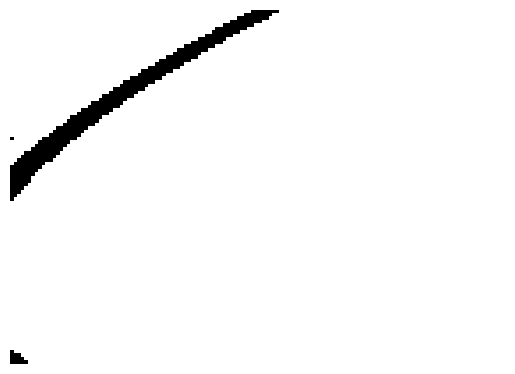

In [115]:
#
dst = np.zeros((H, W), np.uint8)

# for y in range(H):
#     for x in range(W):
#         xb = np.array([x**2, y**2, x*y, x, y, 1]).reshape(1, -1)
#         v = xb @ theta
#         dst[y, x] = v[0, 0]

xx, yy = np.meshgrid(range(W), range(H))
x = xx.reshape(-1, 1)
y = yy.reshape(-1, 1)
A = np.c_[x**2, y**2, x*y, x, y, x**0]
v = A @ theta
dst = v.reshape(H, W).astype(np.uint8)

result = (cv2.absdiff(dst, image) > 15).astype(np.uint8) * 255
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

RANSAC

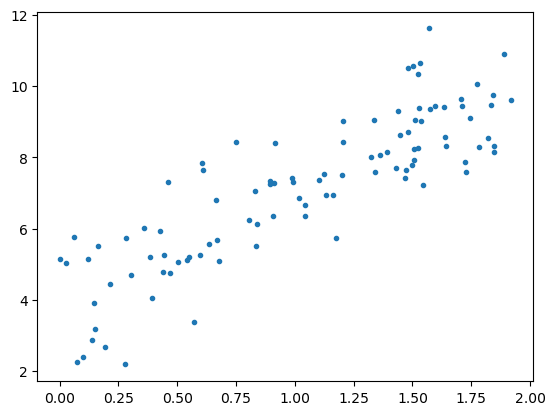

In [55]:
# RANSAC : outlier(이상치/노이즈)를 제거하고, inlier(정상수치)만 모아서 모델링

import numpy as np
import matplotlib.pyplot as plt

m = 100
x = np.random.rand(m,1) * 2  # 0~2
y = x * 3 + 4 + np.random.randn(m,1)

ox = np.random.rand(20, 1) * 2
oy = np.random.rand(20, 1) * 3 + 10


plt.plot(x, y, '.')

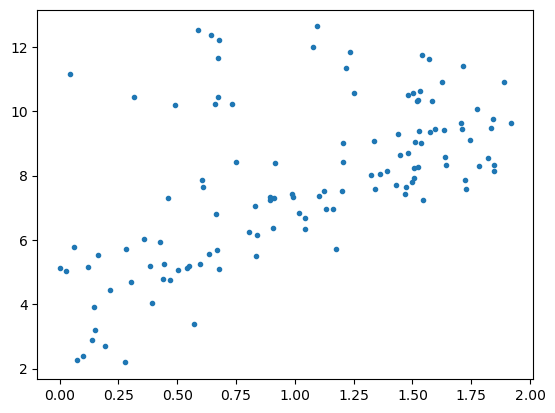

In [56]:
X = np.concat([x, ox], axis = 0)
Y = np.concat([y, oy], axis = 0)

plt.plot(X, Y, '.')

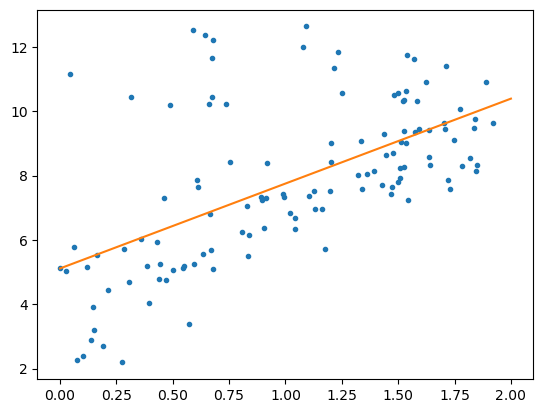

In [ ]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X, Y)

xt = np.linspace(0,2,100).reshape(-1,1)
yt = lin.predict(xt)
plt.plot(X, Y, '.')
plt.plot(xt, yt, '-')


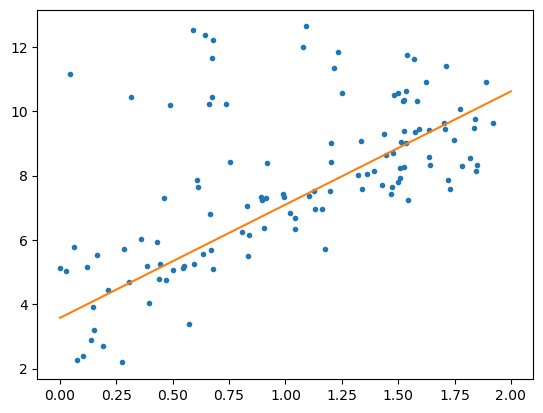

In [72]:
from sklearn.linear_model import RANSACRegressor

lin = RANSACRegressor()
lin.fit(X, Y)

xt = np.linspace(0,2,100).reshape(-1,1)
yt = lin.predict(xt)
plt.plot(X, Y, '.')
plt.plot(xt, yt, '-')


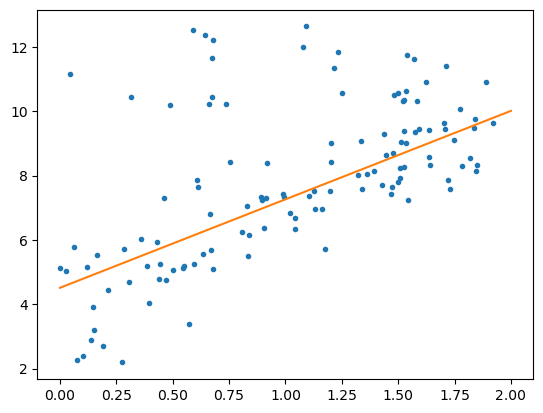

In [ ]:
lin = LinearRegression()
max_in = 0

for _ in range(100):
    index = np.random.permutation(10)[:2]
    sx = X[index]
    sy = Y[index]
    lin.fit(sx,sy)
    pred = lin.predict(X)
    num_in = (abs(pred - Y) < 2).sum()
    if num_in > max_in:
        cond = abs(pred - Y) < 2
        max_in = num_in
max_in

sx = X[cond][:, None]
sy = Y[cond].reshape(-1, 1)
lin.fit(sx, sy)

xt = np.linspace(0, 2, 100).reshape(-1, 1)
yt = lin.predict(xt)
plt.plot(X, Y, '.')
plt.plot(xt, yt, '-')

In [ ]:
a = np.array([1,2,3]) # shape = 3
a[:, np.newaxis].shape